<a href="https://colab.research.google.com/github/jackysuenpython/Supermarket--Big-Mart-Sales-Prediction-using-XG-Boost-Regressor-Model/blob/main/Supermarket_Big_Mart_Sales_Prediction_using_XG_Boost_Regressor_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

Project: Supermarket BigMart wants to understand their past sales data in order to predict the future sales so they can allocate budget and resource
Solution: Build a XG Boost Regression Model to solve this prediction demand

Import Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [20]:
bmdata = pd.read_csv('/content/drive/My Drive/big_mart_sales.csv')

In [21]:
bmdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


1.ItemIdentifier ---- Unique product ID

2.ItemWeight ---- Weight of product

3.ItemFatContent ---- Whether the product is low fat or not

4.ItemVisibility ---- The % of the total display area of all products in a store allocated to the particular product

5.ItemType ---- The category to which the product belongs

6.ItemMRP ---- Maximum Retail Price (list price) of the product

7.OutletIdentifier ---- Unique store ID

8.OutletEstablishmentYear ---- The year in which the store was established

9.OutletSize ---- The size of the store in terms of ground area covered

10.OutletLocationType ---- The type of city in which the store is located

11.OutletType ---- Whether the outlet is just a grocery store or some sort of supermarket

12.ItemOutletSales ---- sales of the product in the particular store. This is the outcome variable to be predicted.

In [22]:
bmdata.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


Data Analysis , Visualization

<ipython-input-18-0a436e9cf98d>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='Item_Weight', y='Outlet_Type', inner='box', palette='Dark2')


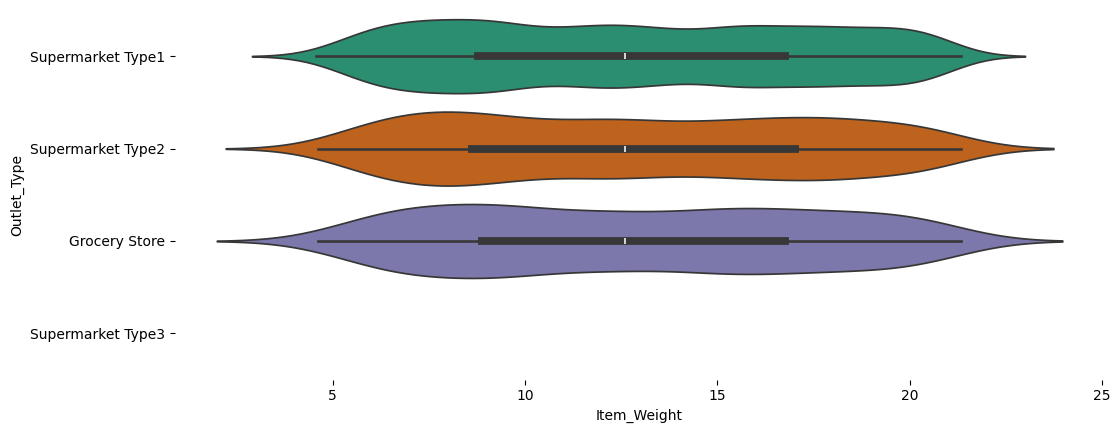

In [18]:
# @title Outlet_Type vs Item_Weight

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Outlet_Type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Item_Weight', y='Outlet_Type', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

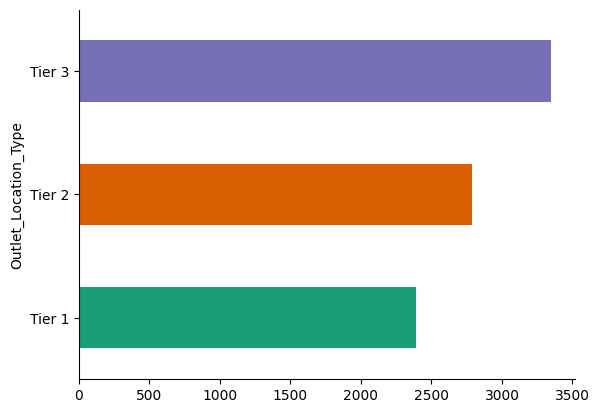

In [17]:
# @title Outlet_Location_Type

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Outlet_Location_Type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

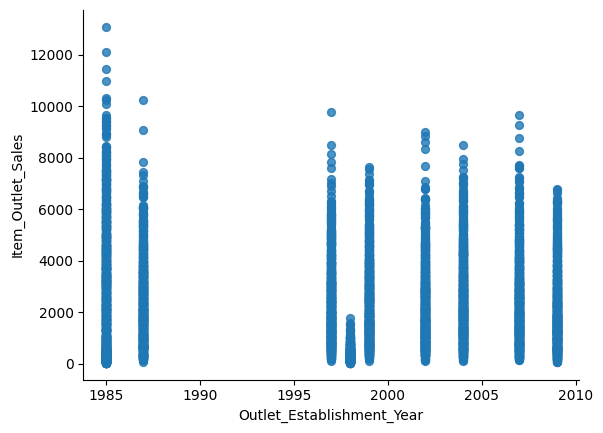

In [16]:
# @title Outlet_Establishment_Year vs Item_Outlet_Sales

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Outlet_Establishment_Year', y='Item_Outlet_Sales', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

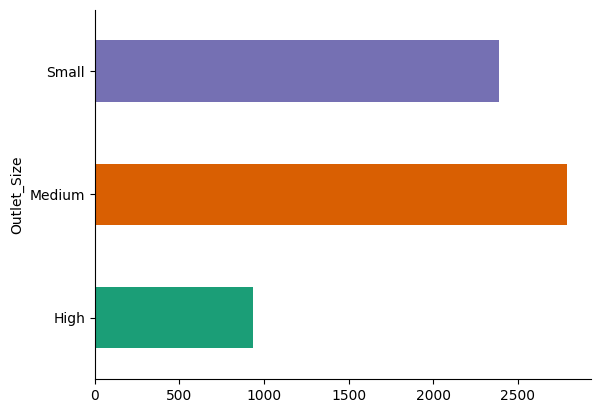

In [15]:
# @title Outlet_Size

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Outlet_Size').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

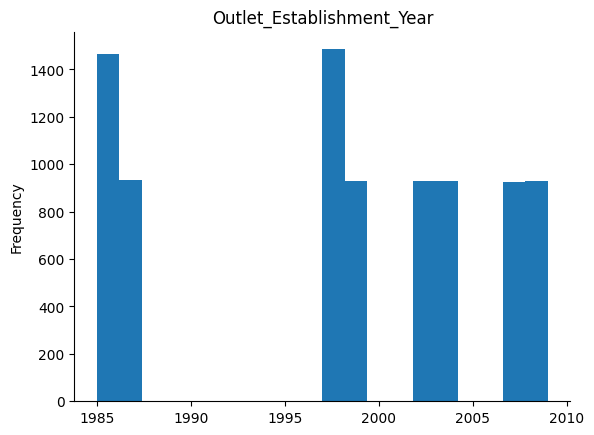

In [14]:
# @title Outlet_Establishment_Year

from matplotlib import pyplot as plt
df['Outlet_Establishment_Year'].plot(kind='hist', bins=20, title='Outlet_Establishment_Year')
plt.gca().spines[['top', 'right',]].set_visible(False)

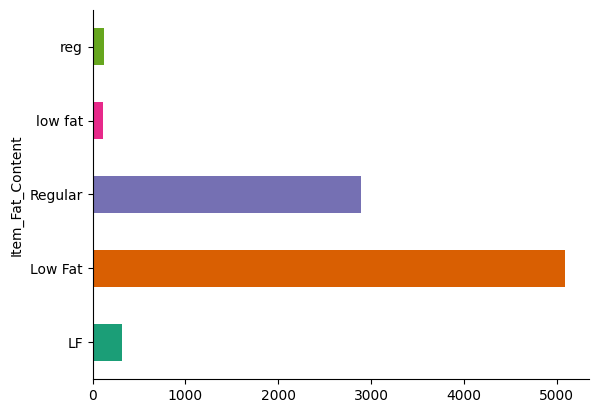

In [13]:
# @title Item_Fat_Content

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Item_Fat_Content').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

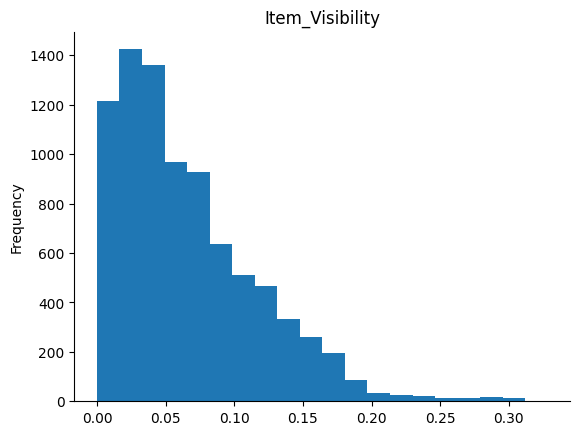

In [12]:
# @title Item_Visibility

from matplotlib import pyplot as plt
df['Item_Visibility'].plot(kind='hist', bins=20, title='Item_Visibility')
plt.gca().spines[['top', 'right',]].set_visible(False)

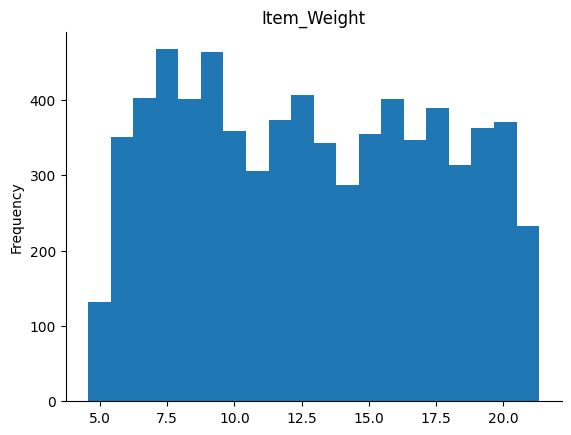

In [11]:
# @title Item_Weight

from matplotlib import pyplot as plt
df['Item_Weight'].plot(kind='hist', bins=20, title='Item_Weight')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [23]:
bmdata.shape

(8523, 12)

The data has 12 columns, 8523 rows

Data Cleaning

In [24]:
#checking the missing values
bmdata.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Filling and handling missing data

In [25]:
#mean of 'Item_Weight' column
bmdata['Item_Weight'].mean()

12.857645184135976

In [26]:
#filling the missing values in Item_Weight column
bmdata['Item_Weight'].fillna(bmdata['Item_Weight'].mean(),inplace=True)

In [28]:
#mode of 'Outlet_Size' column
bmdata['Outlet_Size'].mode()

0    Medium
Name: Outlet_Size, dtype: object

In [29]:
#filling the missing values in Outlet_Size column
mode_of_Outlet_size=bmdata.pivot_table(values='Outlet_Size',columns='Outlet_Type',aggfunc=(lambda x:x.mode()[0]))


In [30]:
print(mode_of_Outlet_size)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [31]:
miss_values=bmdata['Outlet_Size'].isnull()

In [32]:
miss_values

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool

In [33]:
bmdata.loc[miss_values,'Outlet_Size']=bmdata.loc[miss_values,'Outlet_Type'].apply(lambda x: mode_of_Outlet_size[x])

In [34]:
bmdata.isnull().sum()
#Check if all the NA has been filled

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

Data Analysis and Visualization with clean data

In [35]:
bmdata.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [37]:
bmdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


<Figure size 800x600 with 0 Axes>

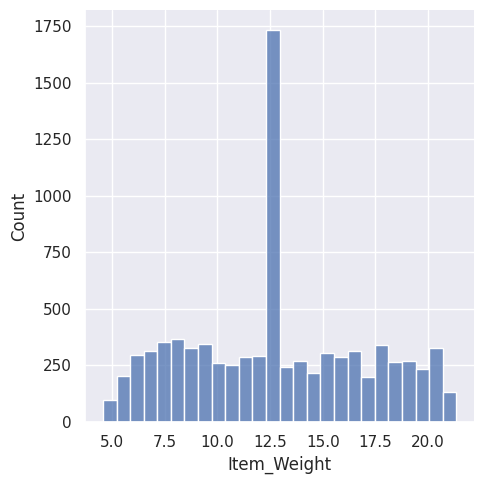

In [40]:
#Item_Weight Distribution
sns.set()
plt.figure(figsize=(8,6))
sns.displot(bmdata['Item_Weight'])
plt.show()

<Figure size 800x600 with 0 Axes>

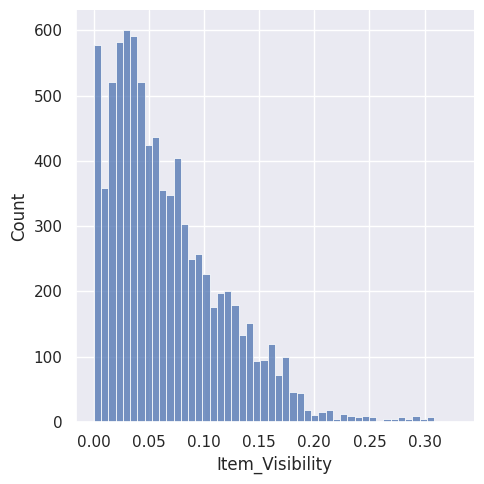

In [42]:
#Item_Visibility Distribution

plt.figure(figsize=(8,6))
sns.displot(bmdata['Item_Visibility'])
plt.show()

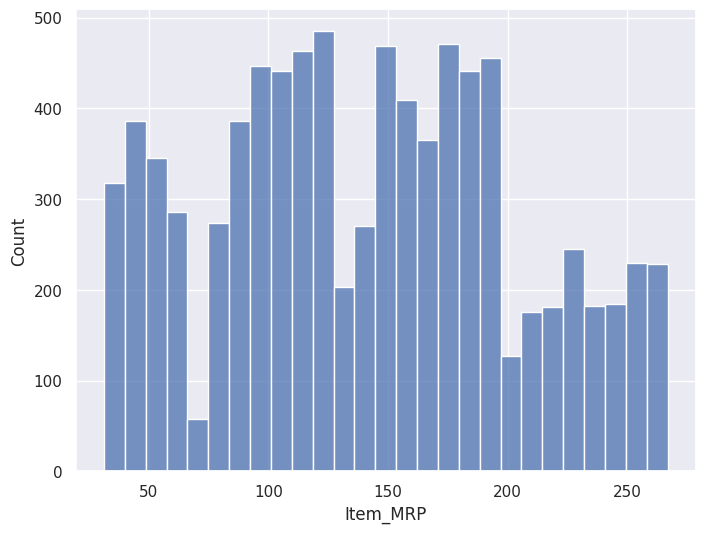

In [44]:
#Item_MRP Distribution
plt.figure(figsize=(8,6))
sns.histplot(bmdata['Item_MRP'])
plt.show()

<ipython-input-45-1decd8ea6e3c>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bmdata['Item_Outlet_Sales'])


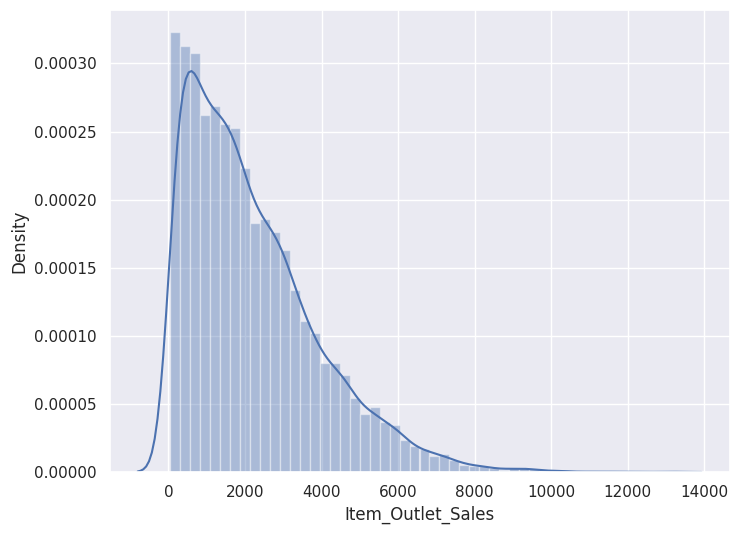

In [45]:
#Item_Outlet_Sales Distribution
plt.figure(figsize=(8,6))
sns.distplot(bmdata['Item_Outlet_Sales'])
plt.show()

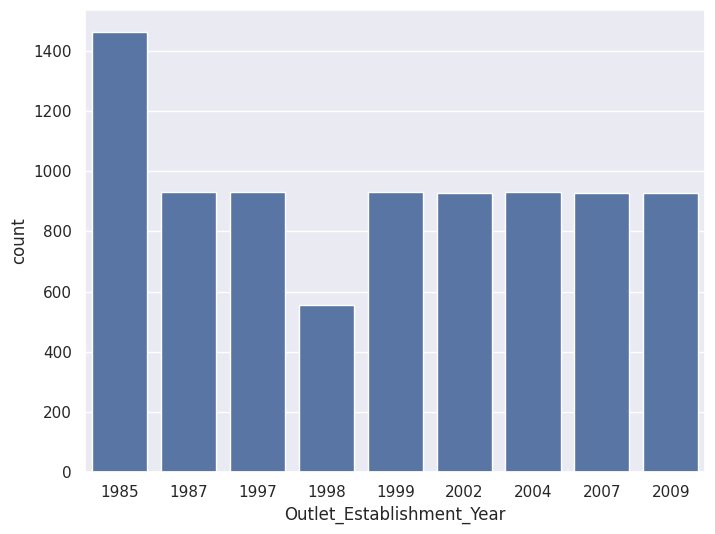

In [46]:
#Outlet_Establishment_Year column
plt.figure(figsize=(8,6))
sns.countplot(x='Outlet_Establishment_Year',data=bmdata)
plt.show()

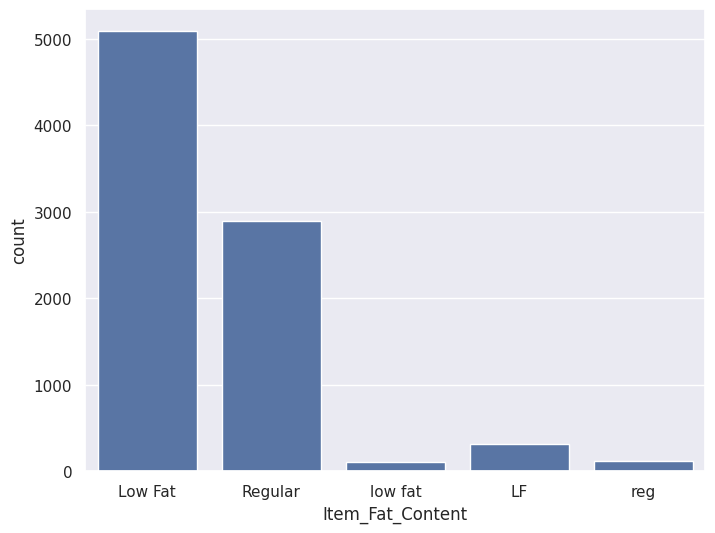

In [47]:
#Item_Fat_Content column
plt.figure(figsize=(8,6))
sns.countplot(x='Item_Fat_Content',data=bmdata)
plt.show()

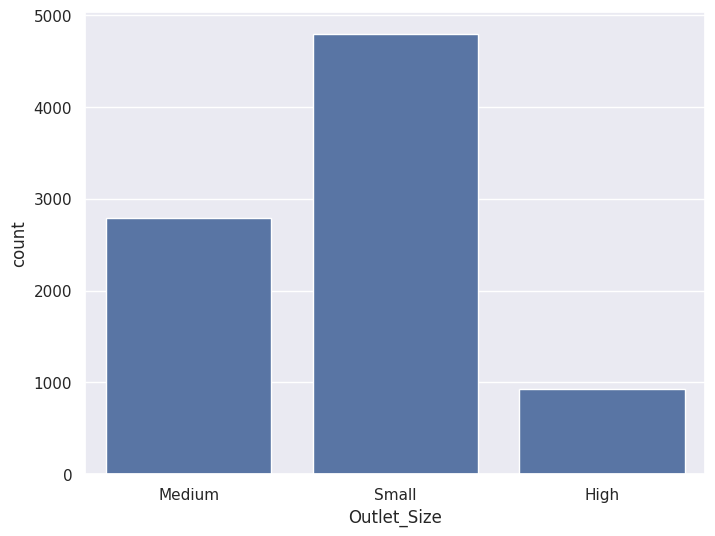

In [48]:
#Outlet_Size column
plt.figure(figsize=(8,6))
sns.countplot(x='Outlet_Size',data=bmdata)
plt.show()

Data Preprocessing

In [49]:
bmdata.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [50]:
bmdata['Item_Fat_Content'].value_counts()
#There should be only low fat and regular, but now there are LF reg lowfat which are essentitally the same type of data.

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [51]:
bmdata.replace({'Item_Fat_Content':{'low fat':'Low FaT','LF':'Low Fat','Low FAT':'Low Fat','reg':'Regular'}},inplace=True)
#Out LF reg low fat into Low Fat or Regular


In [52]:
bmdata['Item_Fat_Content'].value_counts()

Low Fat    5405
Regular    3006
Low FaT     112
Name: Item_Fat_Content, dtype: int64

Label Encoding
Each Column
```
# This is formatted as code
```



In [53]:
encoder=LabelEncoder()

In [54]:
#encoding Item_Identifier
bmdata['Item_Identifier']=encoder.fit_transform(bmdata['Item_Identifier'])

In [55]:
#encoding Item_Fat_Content
bmdata['Item_Fat_Content']=encoder.fit_transform(bmdata['Item_Fat_Content'])

In [56]:
#encoding Item_Type
bmdata['Item_Type']=encoder.fit_transform(bmdata['Item_Type'])

In [57]:
#encoding Outlet_Identifier
bmdata['Outlet_Identifier']=encoder.fit_transform(bmdata['Outlet_Identifier'])

In [58]:
#encoding Outlet_Size
bmdata['Outlet_Size']=encoder.fit_transform(bmdata['Outlet_Size'])

In [59]:
#encoding Outlet_Location_Type
bmdata['Outlet_Location_Type']=encoder.fit_transform(bmdata['Outlet_Location_Type'])

In [60]:
#encoding Outlet_Type
bmdata['Outlet_Type']=encoder.fit_transform(bmdata['Outlet_Type'])

In [61]:
bmdata.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,1,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,2,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,1,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,2,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,1,0.000000,9,53.8614,1,1987,0,2,1,994.7052


Splitting Data into Features and Target

In [62]:
X=bmdata.drop(columns='Item_Outlet_Sales',axis=1) #Drop predicting column (the last column usually)
Y=bmdata['Item_Outlet_Sales'] #Assign Y to the predicting column

In [63]:
X

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,156,9.300,1,0.016047,4,249.8092,9,1999,1,0,1
1,8,5.920,2,0.019278,14,48.2692,3,2009,1,2,2
2,662,17.500,1,0.016760,10,141.6180,9,1999,1,0,1
3,1121,19.200,2,0.000000,6,182.0950,0,1998,2,2,0
4,1297,8.930,1,0.000000,9,53.8614,1,1987,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,1,0.056783,13,214.5218,1,1987,0,2,1
8519,897,8.380,2,0.046982,0,108.1570,7,2002,2,1,1
8520,1357,10.600,1,0.035186,8,85.1224,6,2004,2,1,1
8521,681,7.210,2,0.145221,13,103.1332,3,2009,1,2,2


In [64]:
Y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

Splitting Data into Training and Testing Data

In [65]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [111]:
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=42)


In [66]:
print(X_train.shape,X_test.shape)  80/20 train & data size

(6818, 11) (1705, 11)


Model Training and Evaluation-XGBoost Regressor

In [95]:
model=XGBRegressor()
!pip install scikit-learn


In [115]:
from sklearn.model_selection import GridSearchCV

In [118]:
#Using GridSearchCV to finetune the model inoreder to increase accuracy
model = XGBRegressor()

param_grid = {
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [3, 5, 8],
    'n_estimators': [100, 500, 1000],
    'reg_alpha': [0.1, 1, 10]
}

# Fit the model using GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, refit=True, verbose=2)
grid_search.fit(X_train, y_train)

# Access the best model and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Make predictions using the best model
predictions = best_model.predict(X_test)

# Evaluate model performance

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.1; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.1; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.1; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.1; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.1; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=1; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=1; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=1; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=1; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=1; total time=   0.1s
[CV] END

In [120]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(Y_test, predictions)
print("Mean Squared Error:", mse)


Mean Squared Error: 1177404.4525110638


In [121]:
from math import sqrt

rmse = sqrt(mse)
print("Root Mean Squared Error:", rmse)


Root Mean Squared Error: 1085.0826938584285


In [124]:
from sklearn.metrics import r2_score

r2 = r2_score(Y_test, predictions)
print("R-squared:", r2)


R-squared: 0.6186018924259471


In [127]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(Y_test, predictions)
print("Mean Absolute Error:", mae)



Mean Absolute Error: 762.4923443868693


In [130]:
r2_test=metrics.r2_score(Y_test,predictions)
r2_test

0.6186018924259471

In [ ]:
actual_values = Y_test
predicted_values = predictions

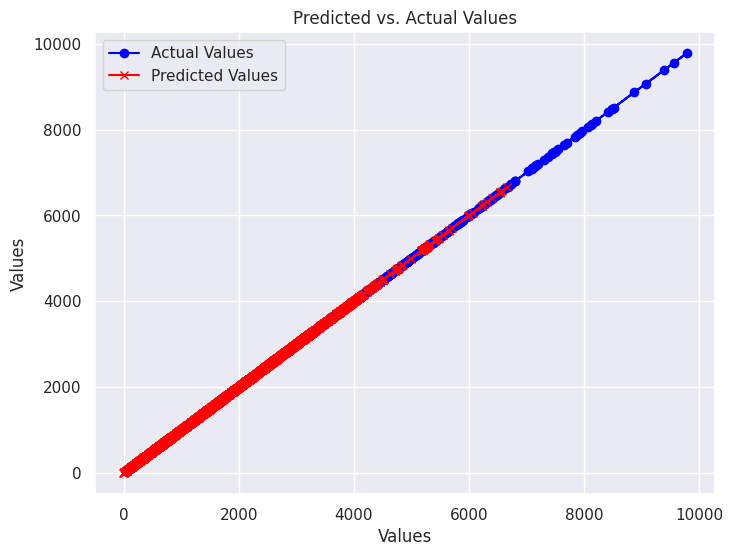

In [138]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))  # Adjust figure size as needed

# Separate actual and predicted values for clarity
actual_values = Y_test
predicted_values = predictions

# Plot actual values with blue color and 'o' marker
plt.plot(actual_values, actual_values, marker='o', color='blue', label='Actual Values')

# Plot predicted values with red color and 'x' marker
plt.plot(predicted_values, predicted_values, marker='x', color='red', label='Predicted Values')

plt.xlabel("Values")
plt.ylabel("Values")
plt.title("Predicted vs. Actual Values")
plt.legend()
plt.grid(True)
plt.show()


This basic visualization plots the predicted values on the x-axis and the actual values on the y-axis. It allows you to visually assess how well the model's predictions align with the true values.

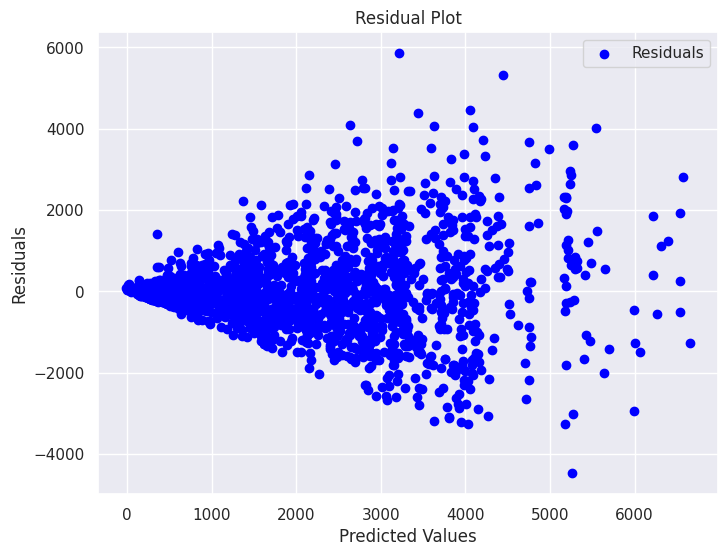

In [139]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

plt.scatter(predictions, Y_test - predictions, c='blue', marker='o', label='Residuals')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.grid(True)
plt.legend()
plt.show()


This plot displays the difference between the predicted and actual values (residuals) on the y-axis and the predicted values on the x-axis. It can help identify potential patterns in the errors, such as bias or heteroscedasticity.

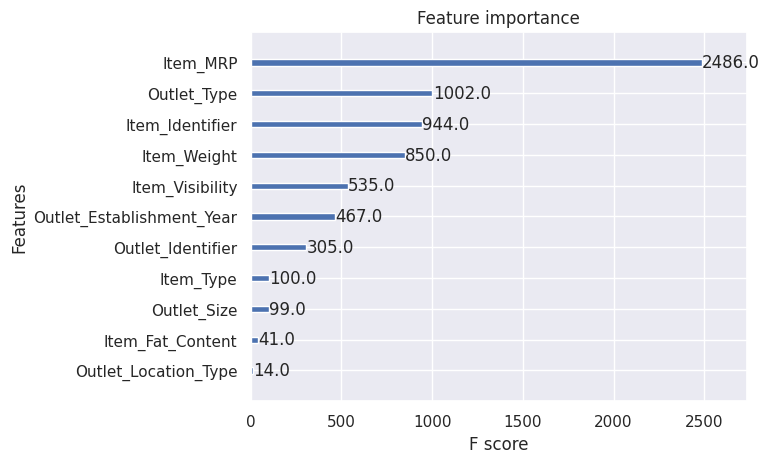

In [142]:
import xgboost

importance = xgboost.plot_importance(best_model)
plt.show()


Feature Importance:

XGBoost provides built-in functionality to calculate feature importance, which indicates the relative contribution of each feature to the model's predictions. Visualizing feature importance using bar charts or heatmaps can help you understand which features are most influential in making predictions.

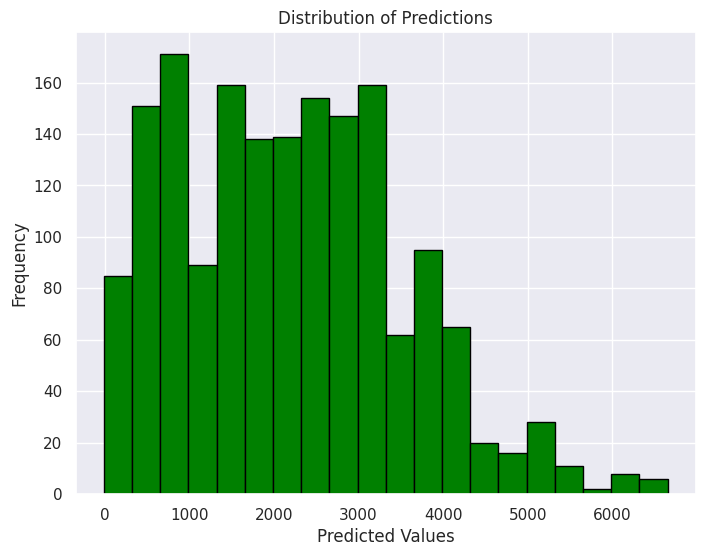

In [143]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

plt.hist(predictions, bins=20, color='green', edgecolor='black')
plt.xlabel("Predicted Values")
plt.ylabel("Frequency")
plt.title("Distribution of Predictions")
plt.grid(True)
plt.show()



Distribution of Predictions:

Plotting the distribution of your predictions can reveal potential issues like skewness or outliers.

In [68]:
model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [69]:
#predicting
train_data_predict=model.predict(X_train)

In [70]:
#RSquared value
r2_train=metrics.r2_score(Y_train,train_data_predict)

In [71]:
r2_train

0.8770496039559836

In [72]:
test_data_predict=model.predict(X_test)

In [73]:
r2_test=metrics.r2_score(Y_test,test_data_predict)

In [74]:
r2_test

0.5034484891150831

In [ ]:
#new_prediction = model.predict(Insert new data here)